<a href="https://colab.research.google.com/github/Kaviya04M/Kaviii/blob/main/WW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
data = pd.read_excel('/content/drive/MyDrive/WiseWork/Task1/twitter_training (1).xlsx')


<ipython-input-5-2a2d2637ea3d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.values, y=sentiment_counts.index, palette='Dark2')


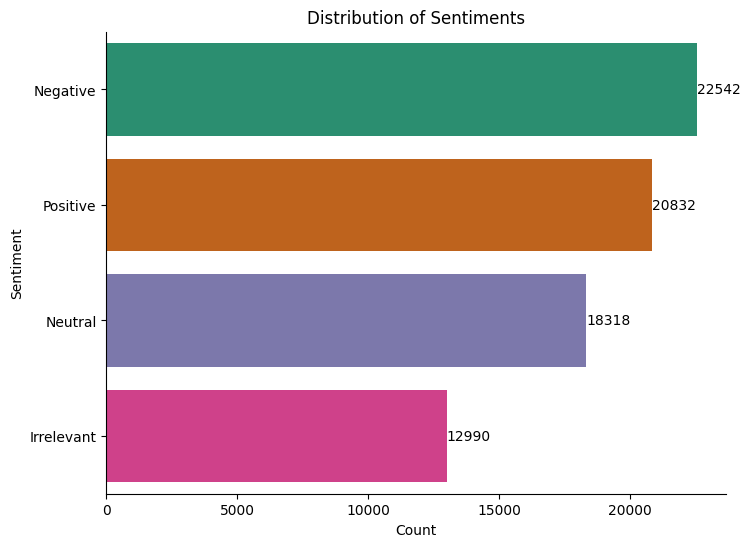

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.values, y=sentiment_counts.index, palette='Dark2')

for i, count in enumerate(sentiment_counts.values):
    plt.text(count + 0.1, i, str(count), va='center')

sns.despine()

plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title('Distribution of Sentiments')

plt.show()


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Pl         74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Message    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
data.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [8]:
data.isnull().sum()

ID             0
Pl             0
Sentiment      0
Message      686
dtype: int64

In [9]:
data.dropna(subset=['Message'], inplace=True)


In [10]:
data.isnull().sum()

ID           0
Pl           0
Sentiment    0
Message      0
dtype: int64

<ipython-input-11-2a2d2637ea3d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.values, y=sentiment_counts.index, palette='Dark2')


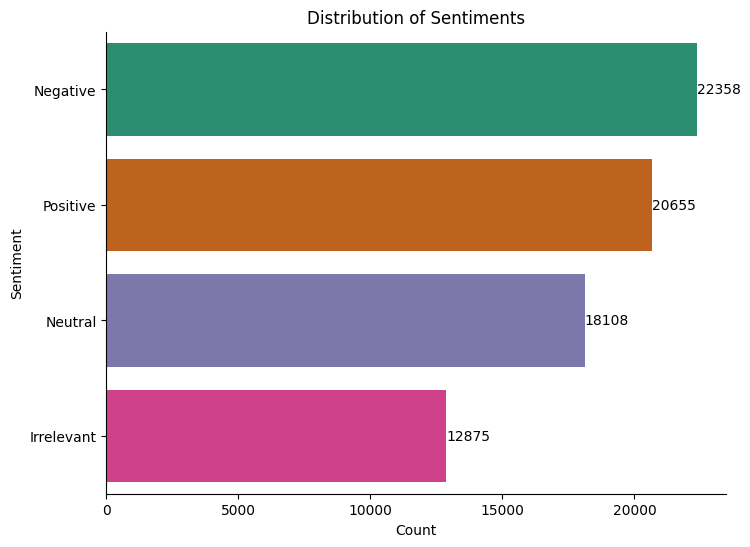

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.values, y=sentiment_counts.index, palette='Dark2')

for i, count in enumerate(sentiment_counts.values):
    plt.text(count + 0.1, i, str(count), va='center')

sns.despine()

plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title('Distribution of Sentiments')

plt.show()


**Pre-Processing**

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer and set of stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Tokenization
        tokens = word_tokenize(text)

        # Remove stopwords and short words
        tokens = [stemmer.stem(word) for word in tokens if word not in stop_words and len(word) > 2]

        return " ".join(tokens)
    else:
        return ""

# Apply preprocessing to the "Message" column
data['Processed_Message'] = data['Message'].apply(preprocess_text)

# Print a sample of the processed messages
print(data[['Message', 'Processed_Message']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                             Message       Processed_Message
0  im getting on borderlands and i will murder yo...   get borderland murder
1  I am coming to the borders and I will kill you...        come border kill
2  im getting on borderlands and i will kill you ...     get borderland kill
3  im coming on borderlands and i will murder you...  come borderland murder
4  im getting on borderlands 2 and i will murder ...   get borderland murder


**SVM**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Processed_Message'], data['Sentiment'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Reduce dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=100)  # Adjust n_components as needed
X_train_tfidf_svd = svd.fit_transform(X_train_tfidf)
X_test_tfidf_svd = svd.transform(X_test_tfidf)

# Convert to sparse matrix for memory efficiency
X_train_tfidf_sparse = csr_matrix(X_train_tfidf_svd)
X_test_tfidf_sparse = csr_matrix(X_test_tfidf_svd)

# Initialize and train a Linear Support Vector Machine (SVM) model with parallel processing
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf_sparse, y_train)

# Predict on the testing data
y_pred = svm_model.predict(X_test_tfidf_sparse)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.5015540540540541
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.48      0.12      0.20      2696
    Negative       0.55      0.65      0.59      4380
     Neutral       0.42      0.50      0.45      3605
    Positive       0.53      0.59      0.56      4119

    accuracy                           0.50     14800
   macro avg       0.50      0.47      0.45     14800
weighted avg       0.50      0.50      0.48     14800



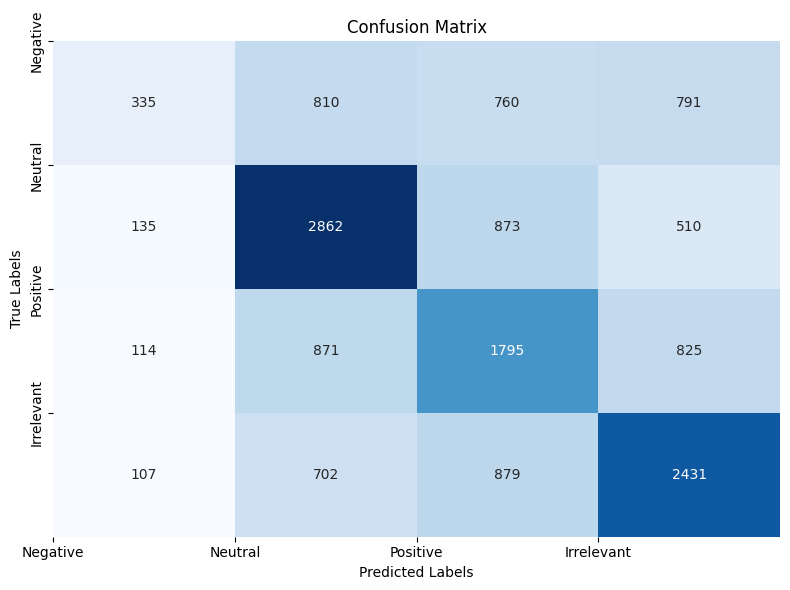

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])
plt.yticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])

# Display the plot
plt.tight_layout()
plt.show()


**Gradient Boosting**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Processed_Message'], data['Sentiment'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = gb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.5255405405405406
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.73      0.17      0.27      2696
    Negative       0.46      0.82      0.59      4380
     Neutral       0.60      0.38      0.46      3605
    Positive       0.59      0.58      0.58      4119

    accuracy                           0.53     14800
   macro avg       0.59      0.49      0.48     14800
weighted avg       0.58      0.53      0.50     14800



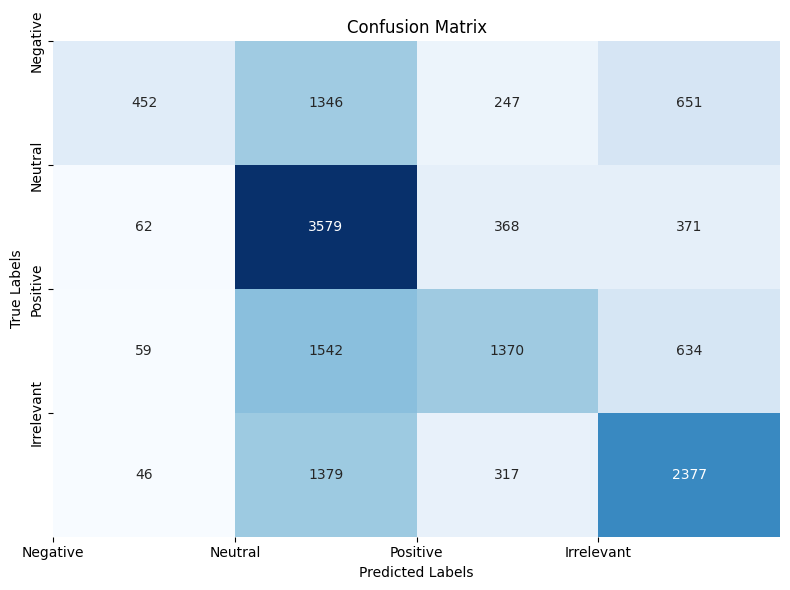

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])
plt.yticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])

# Display the plot
plt.tight_layout()
plt.show()


**Naive Bayes**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Processed_Message'], data['Sentiment'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a Naive Bayes model (MultinomialNB for text data)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = model.predict(X_test_tfidf)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.95      0.36      0.52      2696
    Negative       0.62      0.89      0.73      4380
     Neutral       0.82      0.56      0.66      3605
    Positive       0.67      0.80      0.73      4119

    accuracy                           0.69     14800
   macro avg       0.76      0.65      0.66     14800
weighted avg       0.74      0.69      0.67     14800

Accuracy: 0.6885135135135135


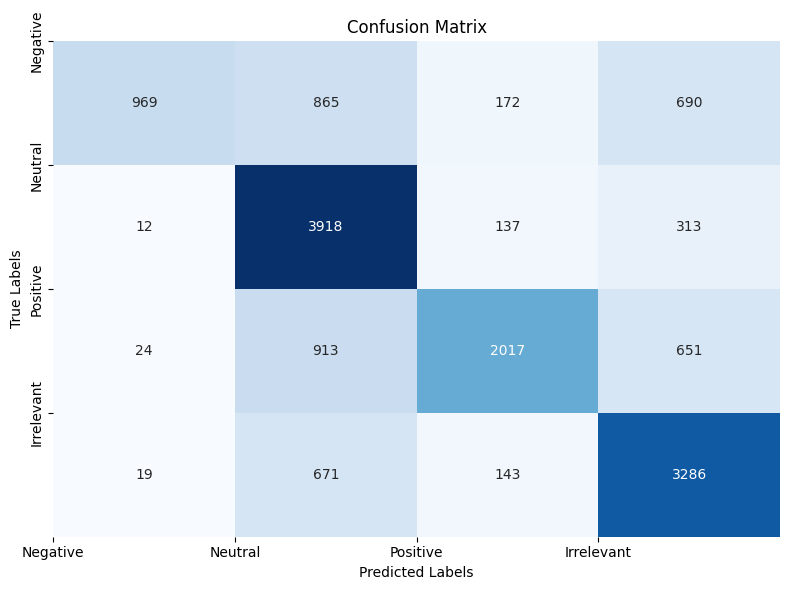

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])
plt.yticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])

# Display the plot
plt.tight_layout()
plt.show()


**Logistic Regression**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data
X = data['Processed_Message']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)

# Making predictions
y_pred = logreg.predict(X_test_tfidf)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7553378378378378

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.81      0.63      0.71      2696
    Negative       0.77      0.82      0.80      4380
     Neutral       0.72      0.73      0.72      3605
    Positive       0.75      0.79      0.77      4119

    accuracy                           0.76     14800
   macro avg       0.76      0.74      0.75     14800
weighted avg       0.76      0.76      0.75     14800



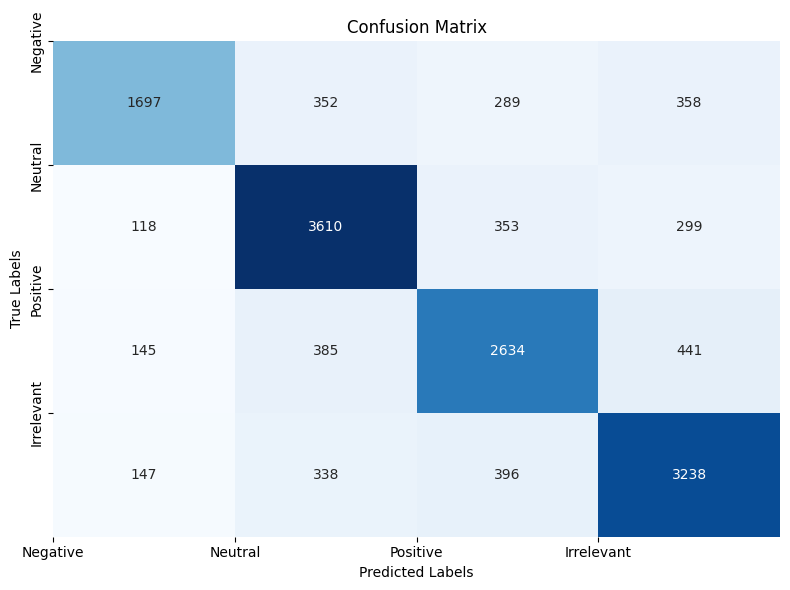

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])
plt.yticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])

# Display the plot
plt.tight_layout()
plt.show()


**Decision Tree**

Accuracy: 0.7786486486486487

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.79      0.69      0.73      2696
    Negative       0.82      0.81      0.82      4380
     Neutral       0.78      0.74      0.76      3605
    Positive       0.74      0.83      0.78      4119

    accuracy                           0.78     14800
   macro avg       0.78      0.77      0.77     14800
weighted avg       0.78      0.78      0.78     14800



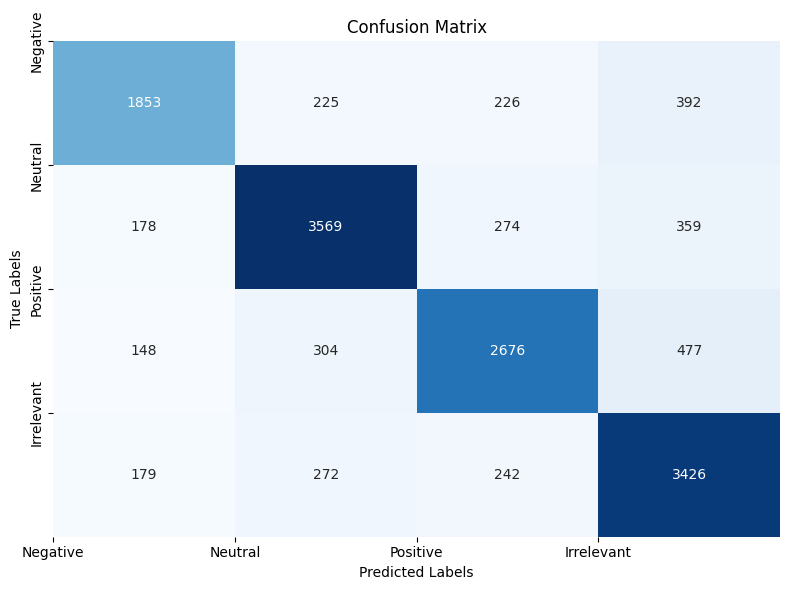

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the data
X = data['Processed_Message']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_tfidf, y_train)

# Making predictions
y_pred = decision_tree.predict(X_test_tfidf)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])
plt.yticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])

# Display the plot
plt.tight_layout()
plt.show()


**Random Forest Classifier**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Processed_Message'], data['Sentiment'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.8994594594594595
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.81      0.88      2696
    Negative       0.91      0.93      0.92      4380
     Neutral       0.92      0.87      0.90      3605
    Positive       0.84      0.95      0.89      4119

    accuracy                           0.90     14800
   macro avg       0.91      0.89      0.90     14800
weighted avg       0.90      0.90      0.90     14800



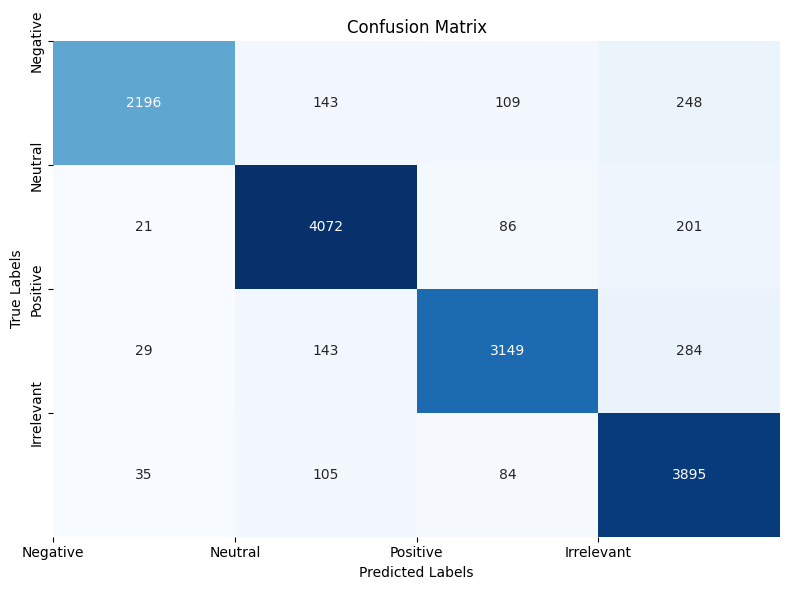

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])
plt.yticks(ticks=[0, 1, 2,3], labels=['Negative', 'Neutral', 'Positive','Irrelevant'])

# Display the plot
plt.tight_layout()
plt.show()


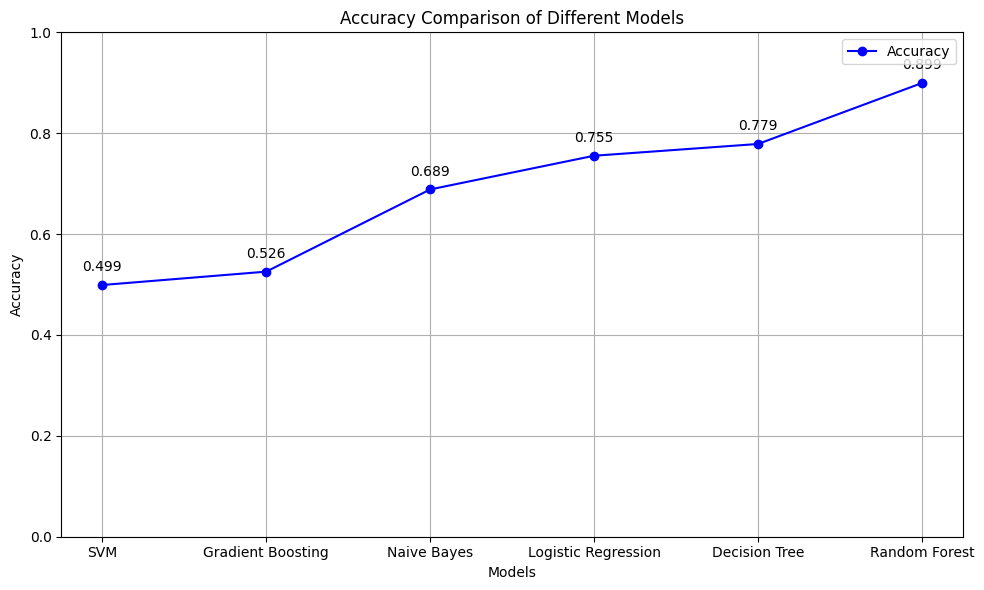

In [24]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
models = ['SVM', 'Gradient Boosting','Naive Bayes','Logistic Regression','Decision Tree','Random Forest']
accuracy_scores = [0.49905405405405406, 0.5255405405405406, 0.6885135135135135, 0.7553378378378378,0.7786486486486487, 0.8994594594594595]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Adding individual data points to the line plot
for i, txt in enumerate(accuracy_scores):
    plt.annotate(f"{txt:.3f}", (models[i], accuracy_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Show plot
plt.show()


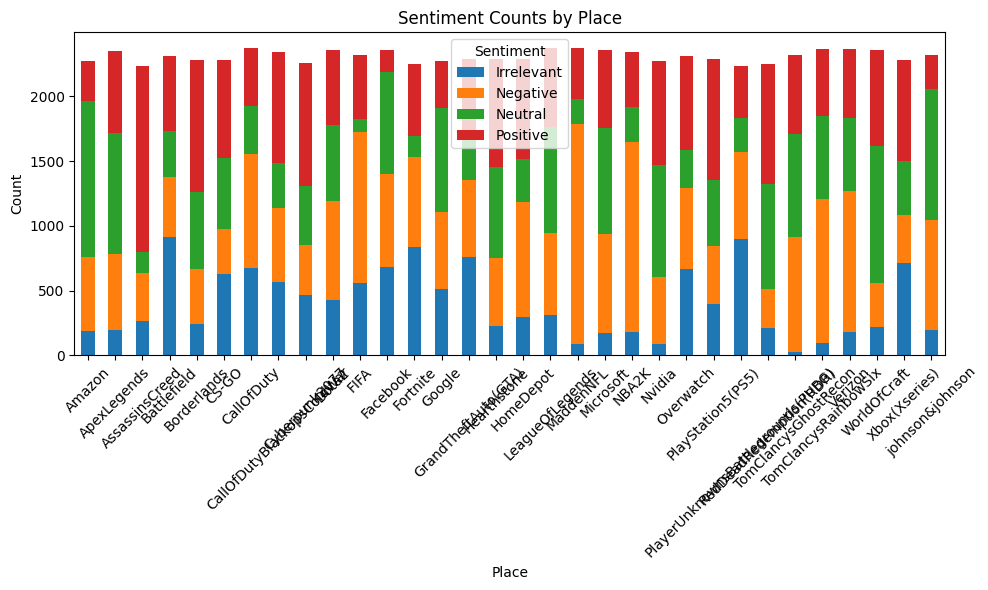

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Group by 'Pl' and 'Sentiment' and get the count of each group
sentiment_counts = df.groupby(['Pl', 'Sentiment']).size().unstack(fill_value=0)

# Plotting
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


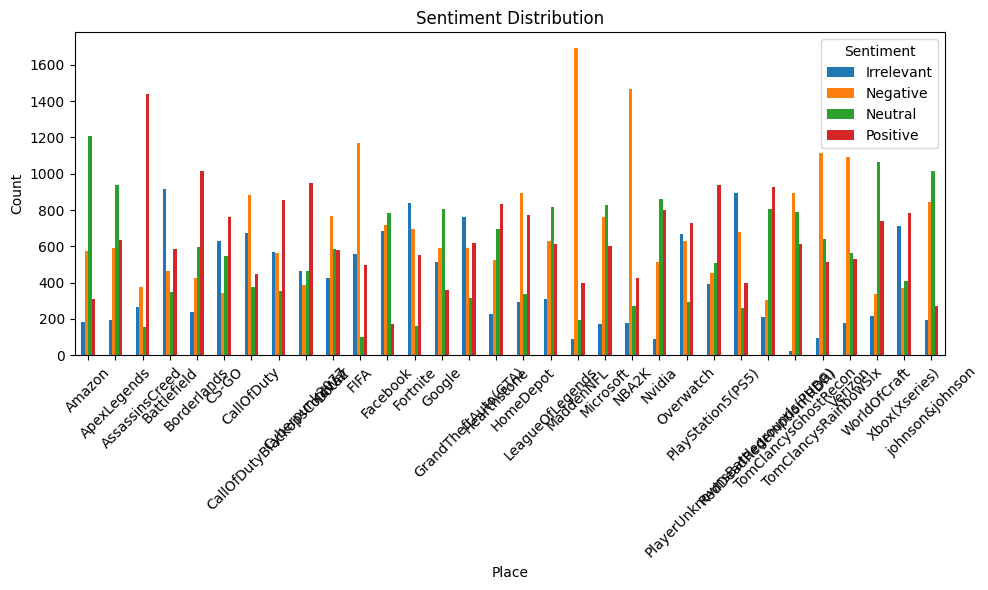

In [26]:
df = pd.DataFrame(data)

# Group by 'Pl' and 'Sentiment' and get the count of each group
sentiment_counts = df.groupby(['Pl', 'Sentiment']).size().unstack(fill_value=0)

# Plotting
sentiment_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()